# loss计算

In [ ]:
import torch
import torch.nn as nn

model = nn.Sequential(
    nn.Linear(10, 1),
    nn.Sigmoid()
)
criterion = nn.BCELoss()

x = torch.randn(16, 10)  # (16, 10)
y = torch.empty(16).random_(2)  # shape=(16, ) 其中每个元素值为0或1

out = model(x)  # (16, 1)
out = out.squeeze(dim=-1)  # (16, )

loss = criterion(out, y)

BCE_loss计算，默认计算的是均值损失

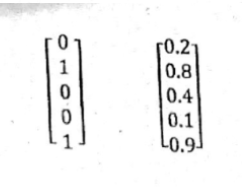

In [ ]:
criterion = nn.BCELoss()#默认是求均值，数据需要是浮点型数据
pre=torch.tensor([0.2,0.8,0.4,0.1,0.9]).float()
tar=torch.tensor([0,1,0,0,1]).float()
l=criterion(pre,tar)
l

tensor(0.2336)

BCE-loss求和计算

In [ ]:
pre=torch.tensor([0.2,0.8,0.4,0.1,0.9]).float()
tar=torch.tensor([0,1,0,0,1]).float()
criterion = nn.BCELoss(reduction="sum")#求和
l=criterion(pre,tar)
l

tensor(1.1678)

In [ ]:
loss=nn.BCELoss(reduction="none")#reduction="none"得到的是loss向量#对每一个样本求损失
l=loss(pre,tar)
l

tensor([0.2231, 0.2231, 0.5108, 0.1054, 0.1054])

In [ ]:
import numpy as np
print(-np.log(0.8))
print(-np.log(0.6))
print(-np.log(0.9))
print(-np.log(0.9))

0.2231435513142097
0.5108256237659907
0.10536051565782628
0.10536051565782628


In [ ]:
1.1678/5

0.23356

# 卷积计算

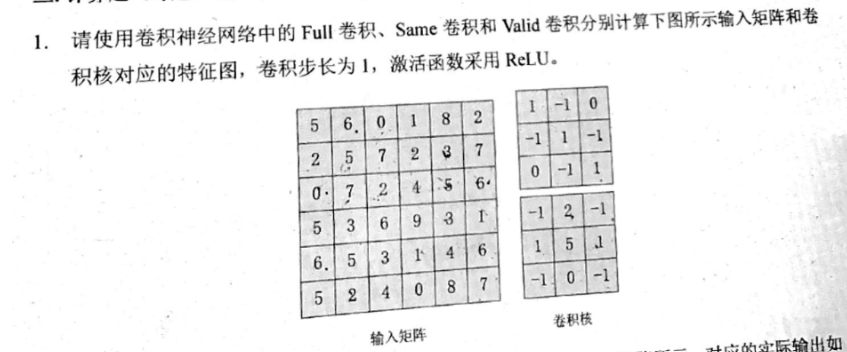

In [ ]:

import tensorflow as tf
input_x = tf.constant([
	[[[5,6,0,1,8,2],
  [2,5,7,2,3,7],
  [0,7,2,4,5,6],
  [5,3,6,9,3,1],
  [6,5,3,1,4,6],
  [5,2,4,0,8,7]
	
]]])

filters = tf.constant([
	[[[1,-1,0],[-1,1,-1],[0,-1,1]]]
])


In [ ]:
input_x.shape

TensorShape([1, 1, 6, 6])

In [ ]:
input_x=tf.reshape(input_x,(1,6,6,1))
input_x

In [7]:
filters.shape

TensorShape([1, 1, 3, 3])

In [8]:
filters=tf.reshape(filters,[3,3,1,1])

In [10]:
res = tf.nn.conv2d(input_x, filters, strides=1, padding='SAME')

### 在没有使用激活函数relu的条件下

In [11]:
res

<tf.Tensor: shape=(1, 6, 6, 1), dtype=int32, numpy=
array([[[[  2],
         [  3],
         [-12],
         [ -6],
         [  9],
         [-13]],

        [[ -1],
         [-10],
         [  8],
         [ -8],
         [-12],
         [  4]],

        [[-11],
         [  5],
         [ -8],
         [ -4],
         [ -8],
         [ -4]],

        [[  1],
         [-17],
         [ -3],
         [  1],
         [ -6],
         [ -9]],

        [[ -7],
         [  0],
         [-10],
         [ -1],
         [  2],
         [ -3]],

        [[ -3],
         [ -6],
         [  4],
         [-10],
         [ -2],
         [ -3]]]], dtype=int32)>

In [13]:
tf.nn.relu(res)

<tf.Tensor: shape=(1, 6, 6, 1), dtype=int32, numpy=
array([[[[2],
         [3],
         [0],
         [0],
         [9],
         [0]],

        [[0],
         [0],
         [8],
         [0],
         [0],
         [4]],

        [[0],
         [5],
         [0],
         [0],
         [0],
         [0]],

        [[1],
         [0],
         [0],
         [1],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         [0],
         [2],
         [0]],

        [[0],
         [0],
         [4],
         [0],
         [0],
         [0]]]], dtype=int32)>

### 在Valid卷积条件下

In [ ]:
res = tf.nn.conv2d(input_x, filters, strides=1, padding='VALID')
print('未使用激活之前的输出',res)


In [ ]:
out=tf.nn.relu(res)
print('relu激活之后的输出：',out)

### 在full卷积下，TF中没有这个参数，可以手动加0实现

In [22]:
input_x = tf.constant([
	[[[0,0,0,0,0,0,0,0],
  [0,5,6,0,1,8,2,0],
  [0,2,5,7,2,3,7,0],
  [0,0,7,2,4,5,6,0],
  [0,5,3,6,9,3,1,0],
  [0,6,5,3,1,4,6,0],
  [0,5,2,4,0,8,7,0],
	[0,0,0,0,0,0,0,0]
]]])
input_x=tf.reshape(input_x,(1,8,8,1))

In [26]:
res = tf.nn.conv2d(input_x, filters, strides=1,padding='SAME')
print('未使用激活之前的输出',res)

未使用激活之前的输出 tf.Tensor(
[[[[  5]
   [  1]
   [ -6]
   [  1]
   [  7]
   [ -6]
   [ -2]
   [  0]]

  [[ -3]
   [  2]
   [  3]
   [-12]
   [ -6]
   [  9]
   [-13]
   [ -2]]

  [[ -2]
   [ -1]
   [-10]
   [  8]
   [ -8]
   [-12]
   [  4]
   [ -5]]

  [[  5]
   [-11]
   [  5]
   [ -8]
   [ -4]
   [ -8]
   [ -4]
   [  1]]

  [[  1]
   [  1]
   [-17]
   [ -3]
   [  1]
   [ -6]
   [ -9]
   [  5]]

  [[ -1]
   [ -7]
   [  0]
   [-10]
   [ -1]
   [  2]
   [ -3]
   [ -5]]

  [[ -5]
   [ -3]
   [ -6]
   [  4]
   [-10]
   [ -2]
   [ -3]
   [ -1]]

  [[  0]
   [ -5]
   [  3]
   [ -2]
   [  4]
   [ -8]
   [  1]
   [  7]]]], shape=(1, 8, 8, 1), dtype=int32)


In [27]:
out = tf.nn.relu(res)
print('激活的输出',out)

激活的输出 tf.Tensor(
[[[[5]
   [1]
   [0]
   [1]
   [7]
   [0]
   [0]
   [0]]

  [[0]
   [2]
   [3]
   [0]
   [0]
   [9]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   [8]
   [0]
   [0]
   [4]
   [0]]

  [[5]
   [0]
   [5]
   [0]
   [0]
   [0]
   [0]
   [1]]

  [[1]
   [1]
   [0]
   [0]
   [1]
   [0]
   [0]
   [5]]

  [[0]
   [0]
   [0]
   [0]
   [0]
   [2]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   [4]
   [0]
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [3]
   [0]
   [4]
   [0]
   [1]
   [7]]]], shape=(1, 8, 8, 1), dtype=int32)


tanh激活函数，tf.tanh()

sig,tf.sigmoid()